In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Demo 1: linear regression (student debt) cost surface
Here we load in the student debt dataset and plot its associated cost function.  This uses the short list of methods in student_debt_wrapper.py (to do plotting and visualization)

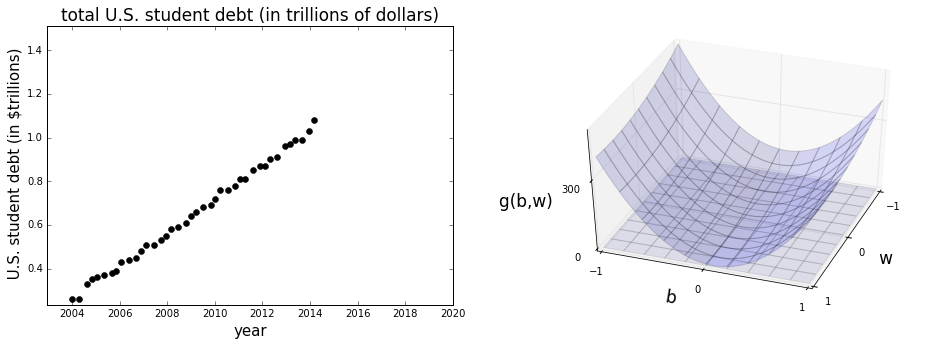

In [2]:
import /python_files/student_debt_wrapper                                    # a collection of methods for loading data and making cool looking plotting
# load in the data
dataset = 'student_debt.csv'                                   # this dataset contains the student debt data
x,y,xlabel,ylabel = student_debt_wrapper.load_data(dataset)    # this method simply loads the data

# make a two-panel figure - the right figure needs to be equipped to illustrate 3d objects
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# show the student debt dataset as well as the assocated linear regression cost function
student_debt_wrapper.plot_pts(x,y,ax1,xlabel,ylabel)           # plots the data in the left panel
student_debt_wrapper.make_cost_surface(x,y,ax2)                # plots the cost function in the right panel

# Demo 2: a simple function with deceivingly difficult to hand-compute minimum  
A wild (convex) function with no by-hand computable minimum $g(w) = w^4 + w^2 + 10w$

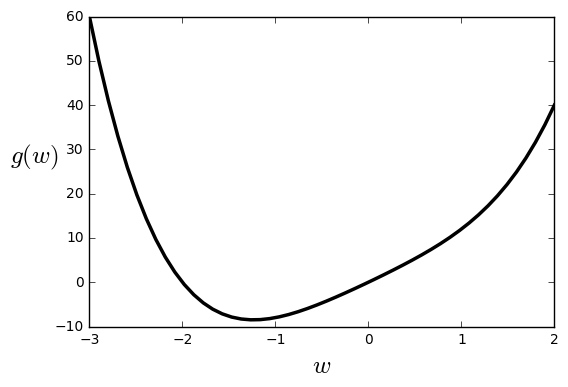

In [1]:
import numpy as np
import matplotlib.pyplot as plt
w = np.linspace(-3,2)
g = w**4 + w**2 + 10*w
fig = plt.figure(facecolor = 'white')
plt.plot(w,g,linewidth = 2.5,color = 'k')
plt.xlabel('$w$',fontsize = 18)
plt.ylabel('$g(w)$    ',rotation = 0,fontsize = 18)
plt.show()

# Demo 3: a first gradient descent example

Here we aim to minimize the cost function $g(w) = w^4 + w^2 + 10w$ using gradient descent.  Note that the here given as $g'(w) = 4w^3 + 2w + 10$.

First lets plot the function.

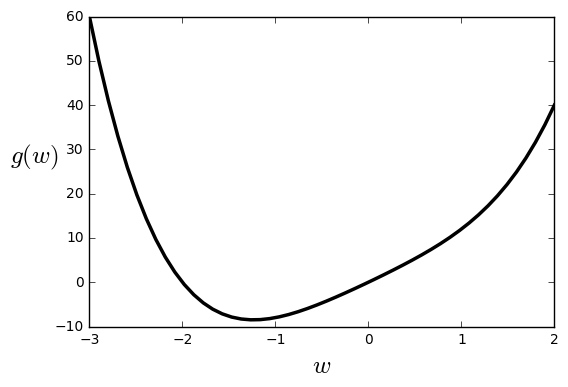

In [2]:
import numpy as np
import matplotlib.pyplot as plt
w = np.linspace(-3,2)
g = w**4 + w**2 + 10*w
fig = plt.figure(facecolor = 'white')
plt.plot(w,g,linewidth = 2.5,color = 'k')
plt.xlabel('$w$',fontsize = 18)
plt.ylabel('$g(w)$    ',rotation = 0,fontsize = 18)
plt.show()

Now we can form the gradient descent python function

In [4]:
# the gradient descent function
def gradient_descent(w,alpha,max_its):
    w_history = []
    w_history.append(w)

    # start gradient descent loop
    for k in range(0,max_its):
        # calculate derivative 
        gprime_w = 4*(w**3) + 2*w + 10   # place derivative here!
        
        # take gradient descent step
        w = w - alpha*gprime_w

        # store weights at this iteration
        w_history.append(w)

    return w_history

Now we run the gradient descent algorithm above

In [5]:
# run gradient descent with chosen initial w = w0 and step length alpha
w_history = gradient_descent(w = -2.7, alpha = 0.01, max_its = 20)    

Finally, lets plot the steps with the function.  Notice a few things.  1) we are slowing down the algorithm A TON so that each step can be visualized.  2) the first few steps are drawn extra slowly with their corresponding tangent lines.  3) the points are colored from green (the first few steps) to red (when the algorithm reaches the maximum number of iterations).

In [3]:
# plot all of the gradient descent steps evaluated at the cost function
from IPython import display  # necessary to produce animation
import /python_files/gradient_descent_demo_1
gradient_descent_demo_1.plot_steps_with_surrogate(w_history)
display.clear_output(wait=True)

SyntaxError: invalid syntax (<ipython-input-3-af39219e45bd>, line 3)

# Demo 4: gradient descent for linear regression
Here we define the gradient and gradient descent function for linear regression.  At each iteration of the algorithm we store the corresponding weights.  Afterwards these are run through the animation backend method written in student_debt_wrapper.py

In [8]:
########## gradient descent functions ##########
# form each partial of the linear regression cost function 
def compute_derivatives(x,y,b,w):
    # initialize each partial derivative as zero
    gprime_b = 0
    gprime_w = 0
    
    # loop over points and update each partial
    P = len(y)
    for p in range(0,P):
        temp = 2*(b + w*x[p] - y[p])
        gprime_b += temp
        gprime_w += temp*x[p]
                   
    return gprime_b,gprime_w

# gradient descent function
def linear_regression_gradient_descent(x,y,max_its):        
    # initialize parameters - we choose this special to illustrate whats going on
    b = -0.1    # initial intercept
    w = -1      # initial slope
    
    # choose fixed steplength value
    alpha = 0.0005
    
    # make list to record weights at each step of algorithm
    param_history = np.zeros((2,max_its+1)) 
    param_history[0,0] = b
    param_history[1,0] = w
    
    # gradient descent loop
    for k in range(1,max_its+1):   

        # compute each partial derivative - gprime_b is partial with respect to b, gprime_w the partial with respect to w
        gprime_b,gprime_w = compute_derivatives(x,y,b,w)        
        
        # take descent step in each partial derivative
        b = b - alpha*gprime_b
        w = w - alpha*gprime_w

        # save new weights
        param_history[0,k] = b
        param_history[1,k] = w
            
    # return parameters from each gradient descent step for cool animation!
    return param_history  

Now we load in the data, and run gradient descent

In [9]:
import /python_files/student_debt_wrapper
# load in data and axis labels
dataset = 'student_debt.csv'
x,y,xlabel,ylabel = student_debt_wrapper.load_data(dataset)

# run gradient descent 
max_its = 400
param_history = linear_regression_gradient_descent(x,y,max_its)

Finally we animate the descent of weights on the cost surface from each step of gradient descent taken

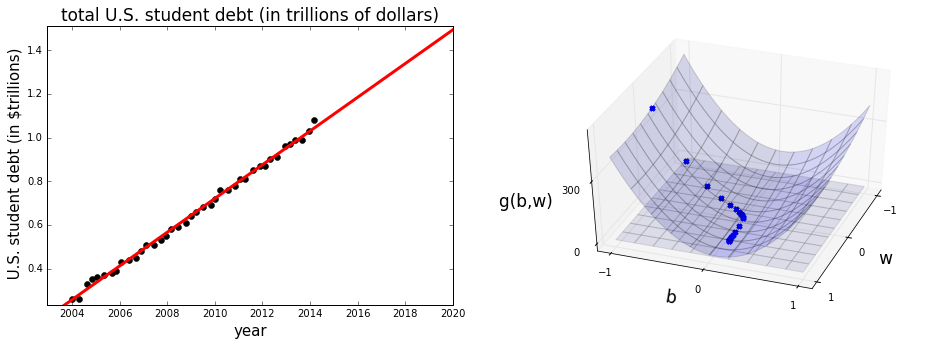

In [10]:
# now we can animate the paramter history from our gradient descent run
student_debt_wrapper.animate(x,y,param_history,xlabel,ylabel)

# Demo 5: gradient descent for linear classification

Although we don't go into detail, the exact same approach is taken to learning parameters for nonlinear regression, linear and nonlinear classification, etc.,  The following are two demos illustrating linear and nonlinear classification, with weights actively computed with each instance

In [11]:
# load in a nice linearly separable dataset
def load_data(dataset):
    # a toy 2d dataset so we can plot things
    data = np.matrix(np.genfromtxt(dataset, delimiter=','))
    x = np.asarray(data[:,0:2])
    y = np.asarray(data[:,2])
    y.shape = (np.size(y),1)
    return x,y

plot these points so you can see what we're doing

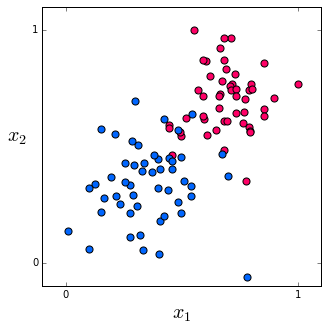

In [12]:
# load a dataset
x,y = load_data(dataset = '2class_data_overlap.csv')

# animated_linear_2class_demo_v2.py is a collection of customized plotting functions - no magic in here
import /python_files/animated_linear_2class_demo
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(111)
animated_linear_2class_demo.plot_pts(x,y,ax1,dim = 2)

In [13]:
########## gradient descent functions ##########
# compute cth class gradient for single data point
def compute_grad(X,y,w):
    # produce gradient for each class weights
    grad = 0
    for p in range(0,len(y)):
        x_p = X[:,p]
        y_p = y[p]
        grad+= -1/(1 + np.exp(y_p*np.dot(x_p.T,w)))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

# learn all C separators together running stochastic gradient descent
def softmax_2class_descent(x,y,max_its):    
    # formulate full input data matrix X - i.e., just pad with single row of ones
    temp = np.shape(x)  
    temp = np.ones((temp[0],1))
    X = np.concatenate((temp,x),1)
    X = X.T
    
    # initialize weights - we choose w = random for illustrative purposes
    w = np.random.randn(3,1)
    
    # choose fixed steplength value
    alpha = 0.05
    
    # make list to record weights at each step of algorithm
    w_history = np.zeros((3,max_its+1)) 
    w_history[:,0] = w.flatten()
    # gradient descent loop
    for k in range(1,max_its+1):   

        # form gradient
        grad = compute_grad(X,y,w)
        
        # take gradient descent step
        w = w - alpha*grad

        # save new weights
        w_history[:,k] = w.flatten()
    
    # return weights from each step
    return w_history    

Now lets run gradient descent with the dataset

In [14]:
# run gradient descent and store each step for animation
w_history = softmax_2class_descent(x,y,max_its = 100)

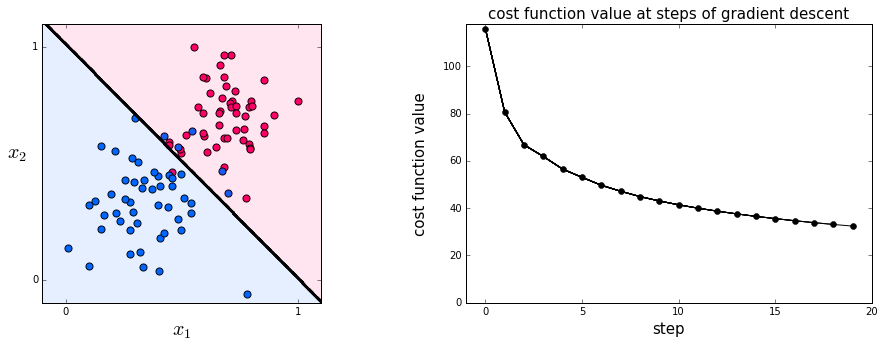

In [15]:
animated_linear_2class_demo.animate_linear_classification(x,y,w_history)

# Demo 6: gradient descent for nonconvex function
Gradient descent is very successfully applied to nonconvnex cost functions (e.g., neural networks) as well.  Below is a toy demo illustrating how gradient descent tends to behave with nonconvex functions.  You can control the location of the initial point $w_0$, as well as the stepsize $\alpha$

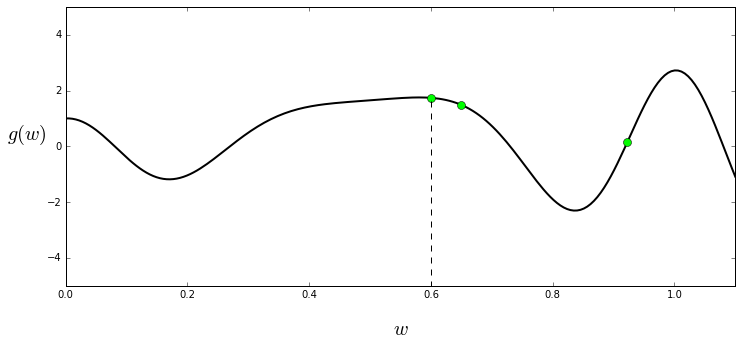

In [18]:
import /python_files/gradient_descent_demo_2
gradient_descent_demo_2.run(w0 = 0.6, alpha = 0.03, max_its = 50)

# Demo 7: nonlinear classification 
Below is a teaser for both nonlinear classification and another descent method known as 'Newton's method'.

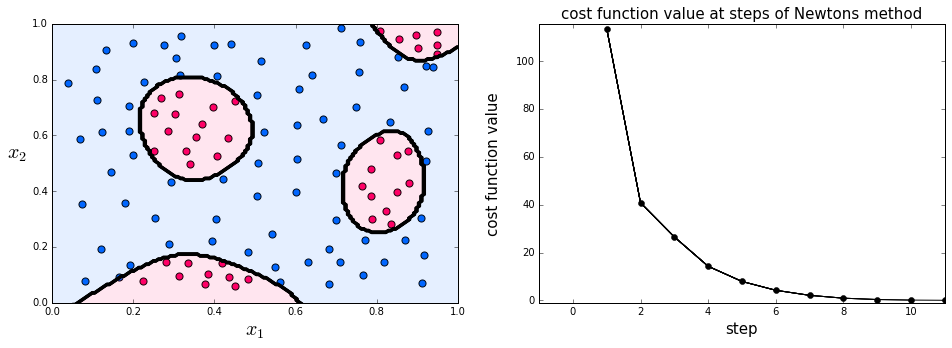

In [20]:
import /python_files/animated_nonlinear_2class_demo
animated_nonlinear_2class_demo.run(dataset = '4eggs_data.csv',feat_type = 'poly', degree = 4)

# Demo 8: multiclass classification 

In this demo we animate how the minimization of the multiclass softmax cost function corresponds visually to the learning of a boundary for multiclass classification on a multiclass visual toy dataset.

The first python cell below contains the essential gradient descent functions.  As with the previous examples, we record each gradient descent step for animation afterwards.

In [20]:
# compute cth class gradient for single data point
def compute_grad(x_p,y_p,W,c,C):
    # produce gradient for each class weights
    temp = 0
    for j in range(0,C):
        temp+=np.exp(np.dot(x_p.T,W[:,j] - W[:,c]))
    temp = (np.divide(1,temp) - int(y_p == (c+1)))*x_p
    
    return temp

# learn all C separators together running stochastic gradient descent
def stochastic_softmax_multi(x,y,max_its):
    # formulate full input data matrix X
    temp = np.shape(x)  
    temp = np.ones((temp[0],1))
    X = np.concatenate((temp,x),1)
    X = X.T
    
    # initialize variables
    C = len(np.unique(y))
    N,P = np.shape(X)
    W = np.random.randn(N,C)
    
    # make container for steps
    W_history = np.zeros((N,C,max_its + 1))
    W_history[:,:,0] = W
    
    # mix up samples
    m = np.random.permutation(P)    # mix up samples

    # gradient descent loop
    for k in range(1,max_its + 1):
        # set step length
        alpha = 1/math.sqrt(float(k))
        alpha = 2
        
        # take stochastic step in pth point
        for p in range(0,P):
            # re-initialize full gradient with zeros
            grad = np.zeros((np.shape(W)))
            
            # update each classifier's weights on pth point
            for c in range(0,C):
                # compute cth class gradient in pth point
                x_p = X[:,m[p]]
                y_p = y[m[p]]
                temp = compute_grad(x_p,y_p,W,c,C)
                grad[:,c] = temp.ravel()

            # take stochastic gradient step in all weights
            W = W - alpha*grad
            
        # record weights at the end of each epoch
        W_history[:,:,k] = W
    
    # return the history of gradient descent steps
    return W_history

In the next python cell we run the above gradient descent function on a multiclass toy dataset.  The python file animated_multiclass_linear_demo contain a data loading function, as well as all of the plotting functions we will use for the final animation.

In [28]:
# run /python_files/stochastic gradient descent
import /python_files/animated_multiclass_linear_demo
x,y = animated_multiclass_linear_demo.load_data('5class_data.csv')
max_its = 20
W_history = stochastic_softmax_multi(x,y,max_its)

In this final python cell we animate the gradient descent steps, showing how the multiclass boundary evolves at each step.

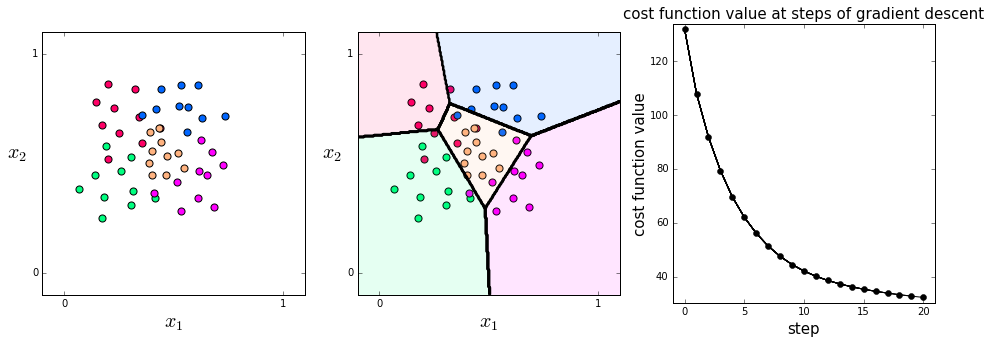

In [35]:
animated_multiclass_linear_demo.animate(x,y,W_history)